# Dogs Outcomes

#### Imports

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

#### Read in Dataset

In [2]:
dogs_outcomes = pd.read_csv('../data/dogs.csv')

#### EDA

In [3]:
dogs_outcomes['outcome_type'].value_counts(normalize=True)

Adoption           0.472716
Return to Owner    0.272555
Transfer           0.217269
Euthanasia         0.024935
Rto-Adopt          0.008053
Died               0.003568
Disposal           0.000508
Missing            0.000395
Name: outcome_type, dtype: float64

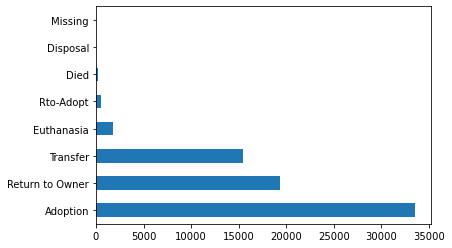

In [4]:
dogs_outcomes['outcome_type'].value_counts().plot(kind='barh')

In [5]:
dogs_outcomes.groupby(['outcome_type', 'outcome_subtype'])['animal_id'].count()

outcome_type     outcome_subtype    
Adoption         Foster                  4680
                 Offsite                  314
Died             At Vet                    28
                 Enroute                    7
                 In Foster                 40
                 In Kennel                158
                 In Surgery                10
Euthanasia       Aggressive               525
                 At Vet                    53
                 Behavior                 149
                 Court/Investigation       31
                 Medical                   69
                 Rabies Risk               94
                 Suffering                839
Missing          In Foster                  5
                 In Kennel                  2
                 Possible Theft            14
Return to Owner  At Vet                     1
                 Customer S                 5
                 Field                     39
                 Foster                    

In [6]:
dogs_outcomes['intake_sex'].value_counts(normalize=True)

Male       0.535168
Female     0.458825
Unknown    0.006007
Name: intake_sex, dtype: float64

Matches the intakes data

In [7]:
dogs_outcomes['outcome_spay_neuter'].value_counts(normalize=True)

Neutered    0.418368
Spayed      0.357169
Intact      0.218456
Unknown     0.006007
Name: outcome_spay_neuter, dtype: float64

63% of dogs are intact when they are brought into the shelter. This confirms that the shelter is actively spaying/neutering the animals

#### Adoptions

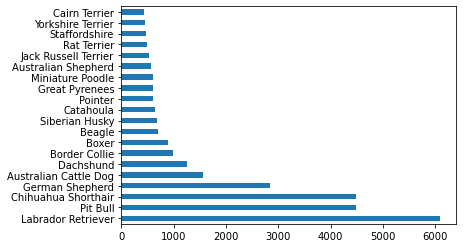

In [8]:
adopted = dogs_outcomes[dogs_outcomes['outcome_type'] == 'Adoption'][['breed_1', 'breed_2']]

pd.concat([adopted['breed_1'], adopted['breed_2']]).value_counts().head(20).plot(kind='barh')

##### Age Distribution of Adopted Dogs

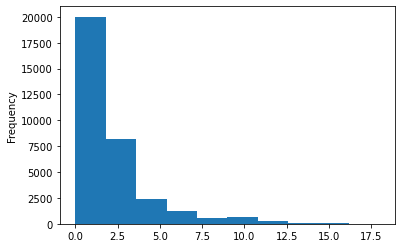

In [9]:
dogs_outcomes[dogs_outcomes['outcome_type'] == 'Adoption']['outcome_age_in_years'].plot(kind='hist');

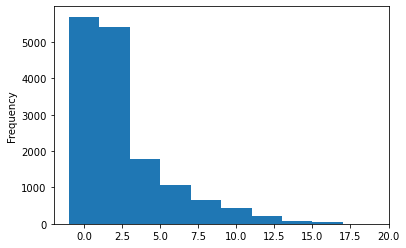

In [10]:
dogs_outcomes[dogs_outcomes['outcome_type'] == 'Transfer']['outcome_age_in_years'].plot(kind='hist');

In [11]:
dogs_outcomes.head()

,animal_id,intake_datetime,name,intake_type,intake_condition,animal_type,intake_sex,intake_spay_neuter,intake_age_in_years,breed,...,color_1,color_2,found_address,found_city,datetime_outcomes,outcome_type,outcome_subtype,outcome_sex,outcome_spay_neuter,outcome_age_in_years
0,A521520,2013-10-01 07:51:00,Nina,Stray,Normal,Dog,Female,Spayed,7.0,Border Terrier/Border Collie,...,White,Tan,NaN,Austin (TX),2013-10-01 15:39:00,Return to Owner,NaN,Female,Spayed,7.0
1,A664233,2013-10-01 08:53:00,Stevie,Stray,Injured,Dog,Female,Intact,3.0,Pit Bull Mix,...,Blue,White,7405 Springtime,Austin (TX),2013-10-01 15:33:00,Euthanasia,Suffering,Female,Intact,3.0
2,A664234,2013-10-01 10:37:00,NaN,Stray,Injured,Dog,Male,Intact,8.0,Border Collie Mix,...,Black,White,5400 Jimmy Clay,Austin (TX),2013-10-01 19:09:00,Euthanasia,Suffering,Male,Intact,8.0
3,A664257,2013-10-01 11:01:00,Pippin,Stray,Normal,Dog,Female,Intact,4.0,Podengo Pequeno Mix,...,Black,NaN,NaN,Travis (TX),2013-10-24 13:31:00,Adoption,Foster,Female,Spayed,4.0
4,A664266,2013-10-01 11:09:00,NaN,Stray,Normal,Dog,Female,Intact,1.0,Chihuahua Shorthair Mix,...,Buff,NaN,NaN,Austin (TX),2013-10-05 15:06:00,Transfer,Partner,Female,Intact,1.0


In [12]:
dogs_outcomes[dogs_outcomes['outcome_type'] == 'Adoption'][['breed_1', 'breed_2']]

,breed_1,breed_2
3,Podengo Pequeno,NaN
7,Chinese Sharpei,Labrador Retriever
9,Great Pyrenees,NaN
12,Chihuahua Shorthair,Dachshund
15,Siberian Husky,NaN
...,...,...
70891,Border Terrier,NaN
70892,Border Terrier,NaN
70895,German Shepherd,Great Pyrenees
70906,Labrador Retriever,NaN


In [13]:
adopted_breeds = pd.concat([adopted['breed_1'], adopted['breed_2']]).value_counts().reset_index()

intake_breeds = pd.concat([dogs_outcomes['breed_1'], dogs_outcomes['breed_2']]).value_counts().reset_index()

In [14]:
adopted_breeds = adopted_breeds.rename(columns={'index': 'breed', 0:'adoption_count'})
intake_breeds  = intake_breeds.rename(columns={'index': 'breed', 0:'intake_count'})

In [15]:
adopted_breeds.head()

,breed,adoption_count
0,Labrador Retriever,6091
1,Pit Bull,4488
2,Chihuahua Shorthair,4480
3,German Shepherd,2839
4,Australian Cattle Dog,1561


In [16]:
intake_breeds.head()

,breed,intake_count
0,Labrador Retriever,11656
1,Pit Bull,11258
2,Chihuahua Shorthair,9122
3,German Shepherd,5437
4,Australian Cattle Dog,2739


In [19]:
adoption_rate = intake_breeds.merge(adopted_breeds, on='breed')

adoption_rate['adoption_rate'] = round((adoption_rate['adoption_count'] / adoption_rate['intake_count']) * 100, 2)

In [30]:
adoption_rate.sort_values('intake_count', ascending=False).head(15)

,breed,intake_count,adoption_count,adoption_rate
0,Labrador Retriever,11656,6091,52.26
1,Pit Bull,11258,4488,39.86
2,Chihuahua Shorthair,9122,4480,49.11
3,German Shepherd,5437,2839,52.22
4,Australian Cattle Dog,2739,1561,56.99
5,Dachshund,2371,1259,53.10
6,Boxer,1837,896,48.78
7,Border Collie,1771,999,56.41
8,Miniature Poodle,1568,599,38.20
9,Siberian Husky,1445,692,47.89


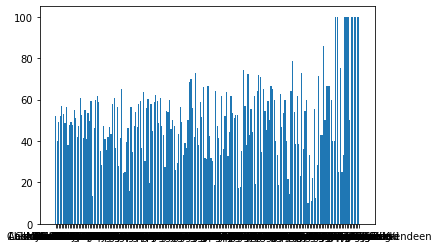

In [28]:
plt.bar(adoption_rate['breed'], adoption_rate['adoption_rate']);